<a href="https://colab.research.google.com/github/mayurpanchal139/capstone_ML_project/blob/main/Mayur_capstone_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Yes Bank stock closing price prediction by regression involves using historical data to develop a regression model that can forecast future stock prices of Yes Bank.The dataset used in this project consisted of monthly stock prices of Yes Bank since its inception, including closing, starting, highest, and lowest stock prices.


To predict the stock's closing price, I developed three models namely Linear_Regression, Random Forest and XGBoost Regressor model. The model was trained using  historical stock price data and various features such as mean of Open, High and Low faetures.The performance of the model was evaluated using metrics like RMSE (Root Mean Squared Error),adjustes R2 and R2 score. xGBoost regressor performed well among the three with high R2 score and adjusted R2.

The findings and insights gained from this project can be utilized by investors, analysts, and decision-makers to make informed investment or business decisions related to Yes Bank's stock.



# **GitHub Link -**

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/data_YesBank_StockPrices (1).csv"
df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

There are 185 rows and 5 columns in this Dataset.

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There are no duplicates value in the Dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

we can clearly see that there is no missing value present in the Data.

<Axes: >

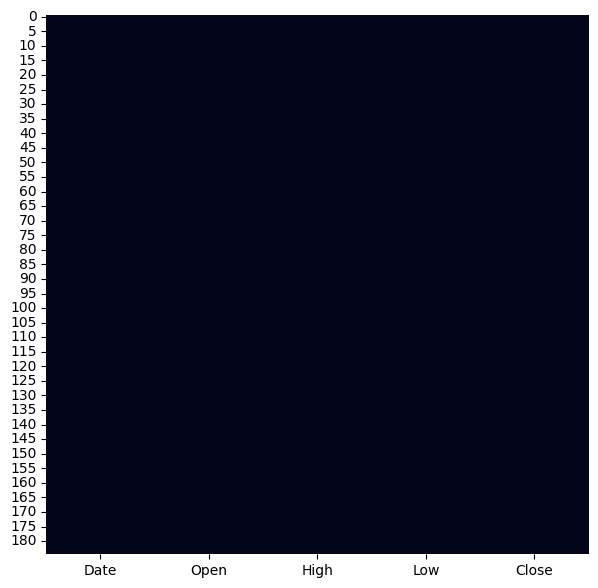

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (7,7))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

* Dataset includes 185 Rows and 5 Columns.
* There are no missing and duplicates value present in Data.
*  Among the 5 columns, 4 are independent variables (Date, open,high,low) and dependent variable(close).
* All the independent variables are of float data type except date which is object and need to be converted to datetime.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

* Date - This column includes date in terms of month and year.
* open - This column contains opening price of the stock of respctive date.
* High - This column contains highest price of the stock of respective date.
* Low - This column contains lowest price of the stock of respecctive date.
* Close - This column contains closing price of the stock of respecctive date.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

* Date has 185 unique values.
* OPen has 183 unique values.
* High has 184 unique values.
* Low has 183 unique values.
* Close has 185 unique values.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Converting Date column from object format to Date
df["Date"]=pd.to_datetime(df["Date"],format='%b-%y')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

I converted datatype of date column from string to datetime to get better visualization of closing price to date.

In [ ]:
# Creating copy of original data
df1 = df.copy()
df1.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
# Separating  independent variable
independent_variables = df1.columns.tolist()[1:-1]


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

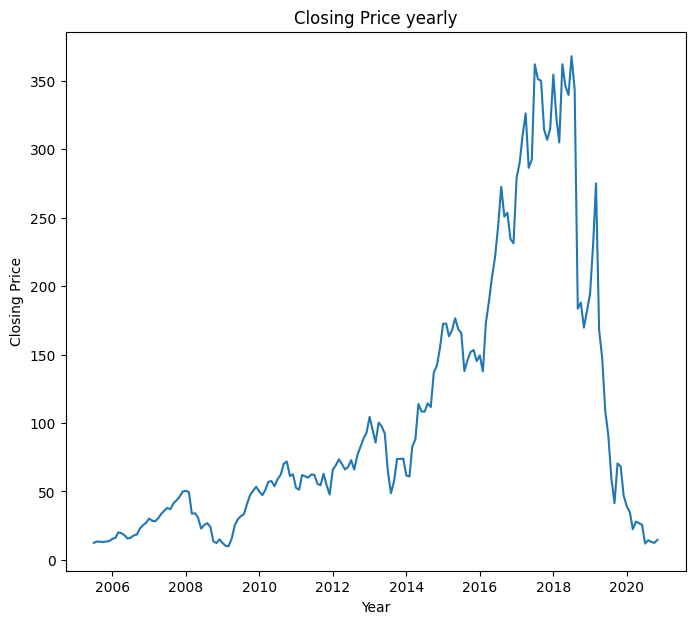

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,7))
plt.plot(df1["Date"],df["Close"])

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

##### 1. Why did you pick the specific chart?

I have choosen this chart to see the closing price over years.

##### 2. What is/are the insight(s) found from the chart?

It is clearly visible after 2018 closing price has suddenly dropped.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, because of the 2018 fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.



#### Chart - 2

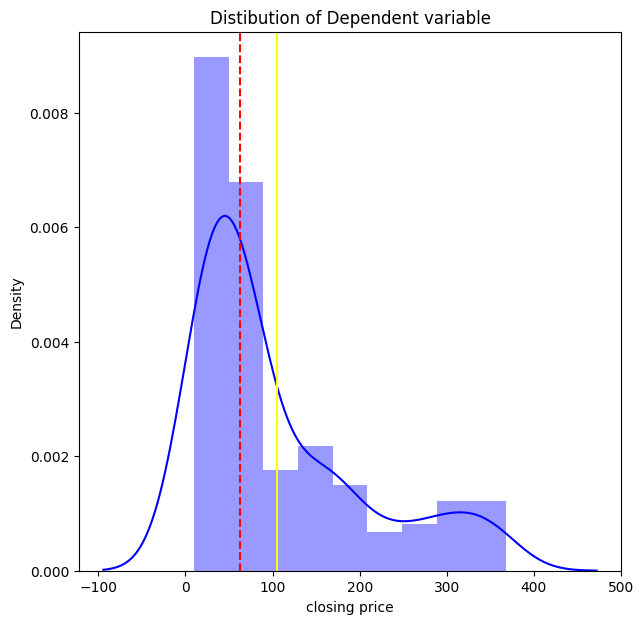

In [ ]:
# Chart - 2 visualization code
#checking the distribution of the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(df1['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(df1['Close'].mean(),color='yellow')
plt.axvline(df1['Close'].median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the Dependent variable. distplot gives more accurate result.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that the data is somewhat positively skewed(right skew).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, Dependent vaiable is right skewed and i need to tranform that distribution fron right skewed to normally distributed to enhance the model performance.

#### Chart - 3

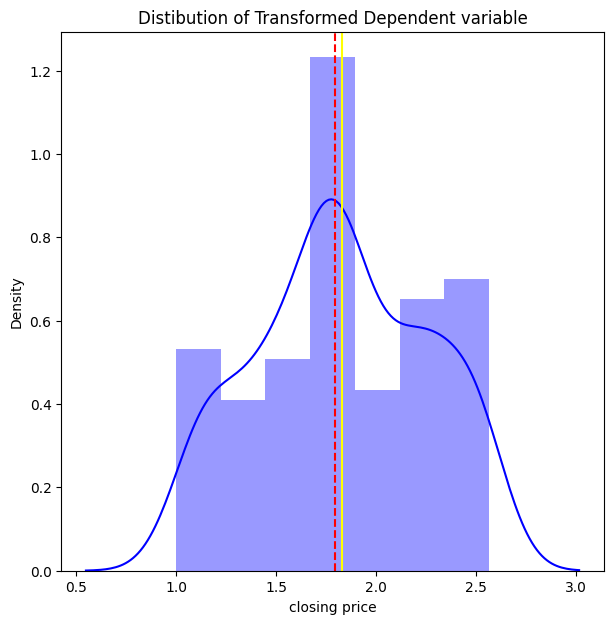

In [ ]:
# Chart - 3 visualization code
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df1['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')


plt.axvline(np.log10(df1['Close']).mean(),color='yellow')
plt.axvline(np.log10(df1['Close']).median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart to see the distribution of dependent vasriable after applying log transformation.

##### 2. What is/are the insight(s) found from the chart?

We can see that after appling log tranformation dependent variable is normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the data is normally distributed,The performance of model increases.

#### Chart - 4

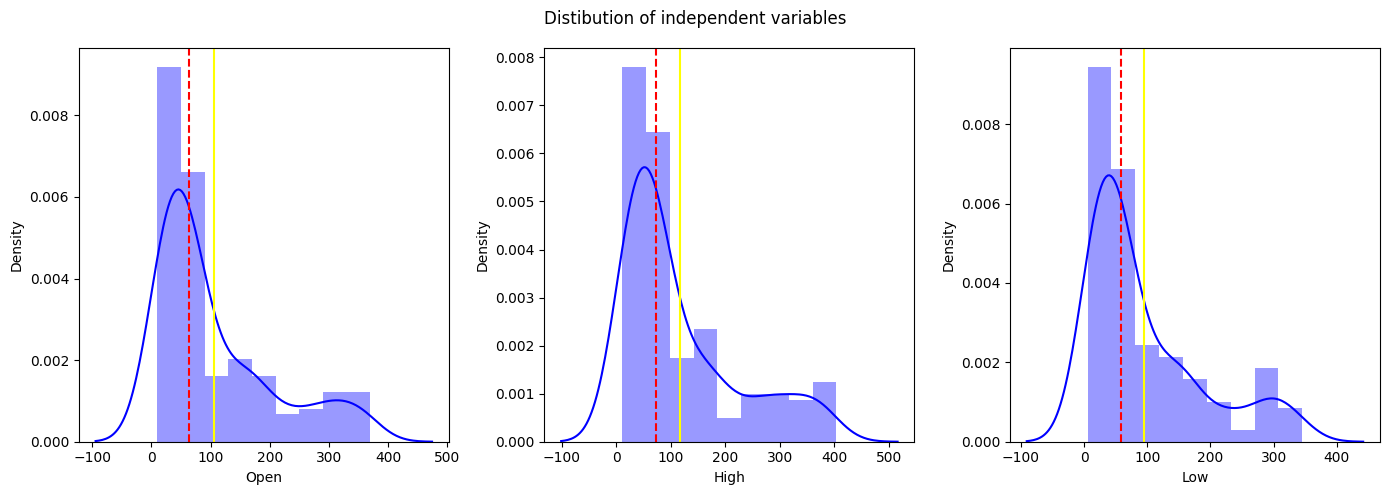

In [ ]:
# Chart - 4 visualization code
# Plotting the distributions of Independent features.
plt.figure(figsize=(14, 5))

for i, num_cols in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(df1[num_cols], color='b')
    plt.xlabel(num_cols, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(df1[num_cols].mean(), color='yellow')
    plt.axvline(df1[num_cols].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have picked this chart to see the distribution of independent numeical variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clearly seen that all three independent numeical variable is right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By observing above chart I came to know that transformation need to be applied on all independent variables which would essentially require for a good model

#### Chart - 5

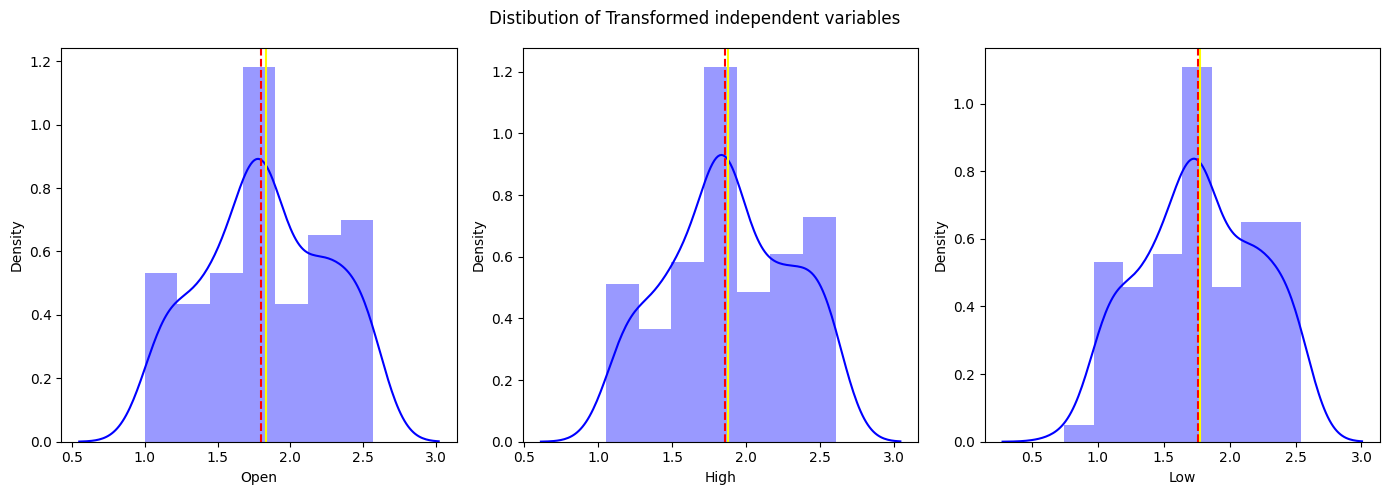

In [ ]:
# Chart - 5 visualization code
# Distribution of transformed independent variables
plt.figure(figsize=(14, 5))

for i, num_cols in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(np.log10(df1[num_cols]), color='b')
    plt.xlabel(num_cols, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(df1[num_cols]).mean(), color='yellow')
    plt.axvline(np.log10(df1[num_cols]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of Transformed independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables after applying transformation.

##### 2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can build best model if the data is normally distributed.

In [ ]:
!pip install mplfinance

import mplfinance as mpf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


#### Chart - 6

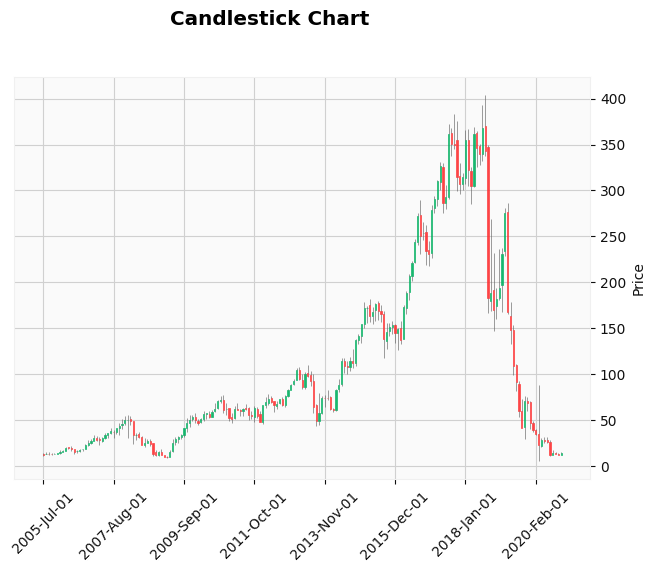

In [ ]:
# Chart - 6 visualization code

df_candle = df1[['Date','Open','High','Low', 'Close']].set_index("Date")

mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')



##### 1. Why did you pick the specific chart?

This chart is used to show the  price of the stock over time.

##### 2. What is/are the insight(s) found from the chart?

It can clearly seen from chart the price has increased till 2018 but suddenly dropped after 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, The reason behind dropping the price after 2018 was some news. we should be  aware about the news of the stock you are investing in.

#### Chart - 7

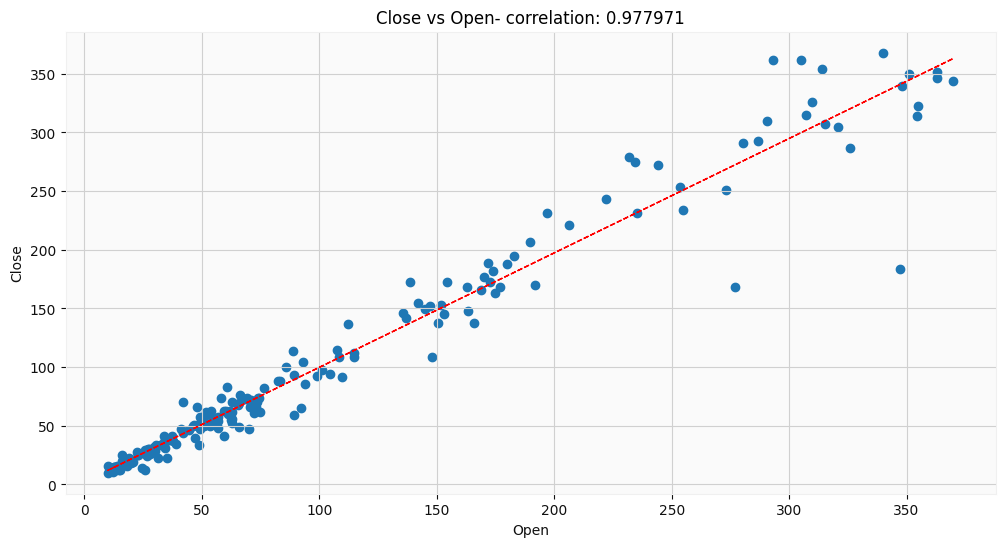

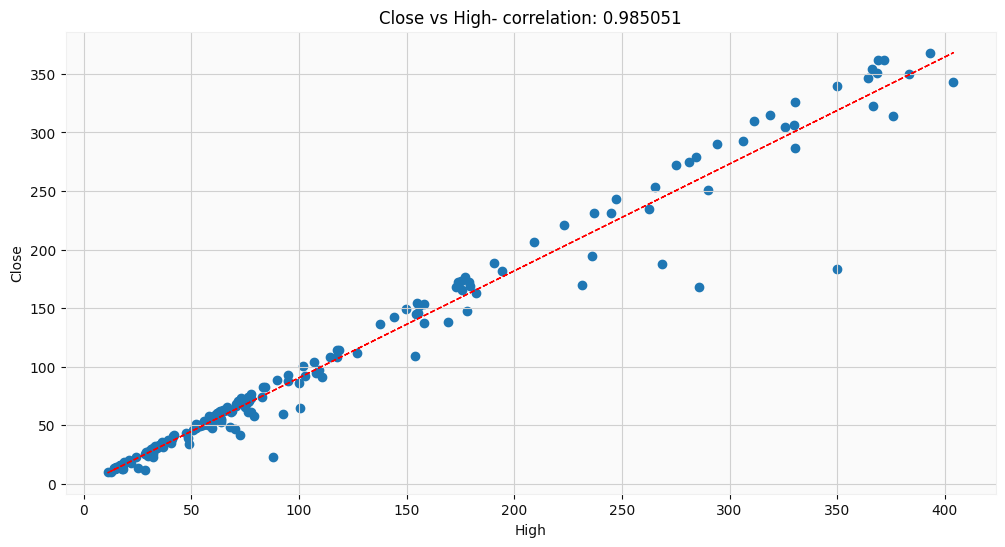

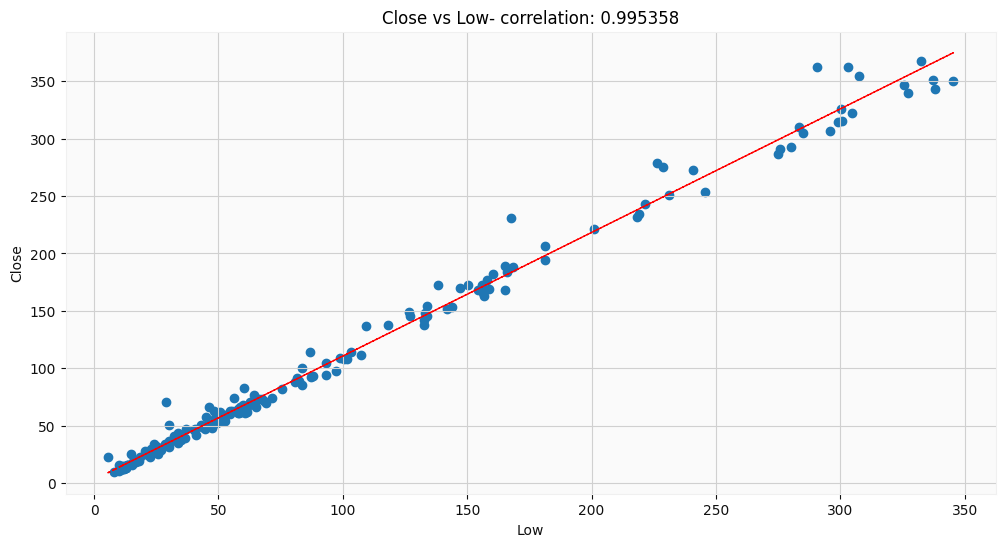

In [ ]:
# Chart - 7 visualization code
# Plotting graph Independent variable vs Dependent variable to check Multicollinearity.
for num_cols in independent_variables:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = df1[num_cols]
  label = df1['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.


  plt.xlabel(num_cols)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + num_cols + '- correlation: ' + str(round((correlation),6)))

  z = np.polyfit(df1[num_cols], df1['Close'], 1)
  y_ = np.poly1d(z)(df1[num_cols])

  plt.plot(df1[num_cols], y_, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

I have used this plot to see the corelation between dependent and independent variable.

##### 2. What is/are the insight(s) found from the chart?

From above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollinearity in our data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

when independent variables are highly correlated to y variable, it means that linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 8  Corelation Heatmap

<Axes: >

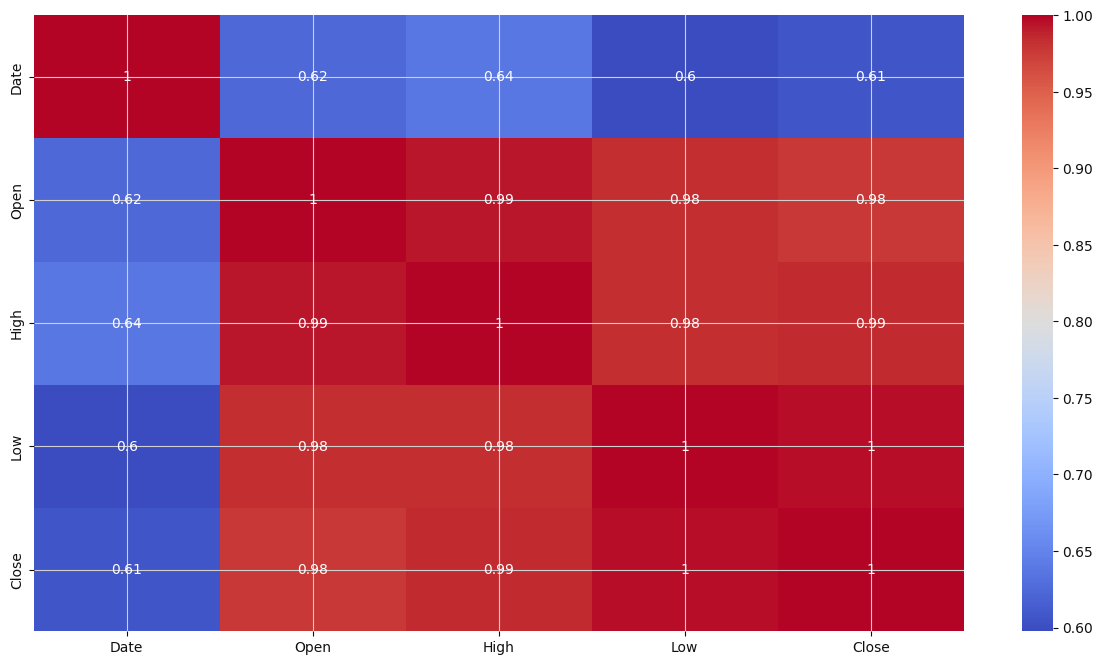

In [ ]:
# Chart - 8 visualization code
# Heatmap to see collinearity between columns
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

I have used heatmap to identify the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?


It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. So, I am going to do feature generation to avoid multicollinearity.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Pair Plot

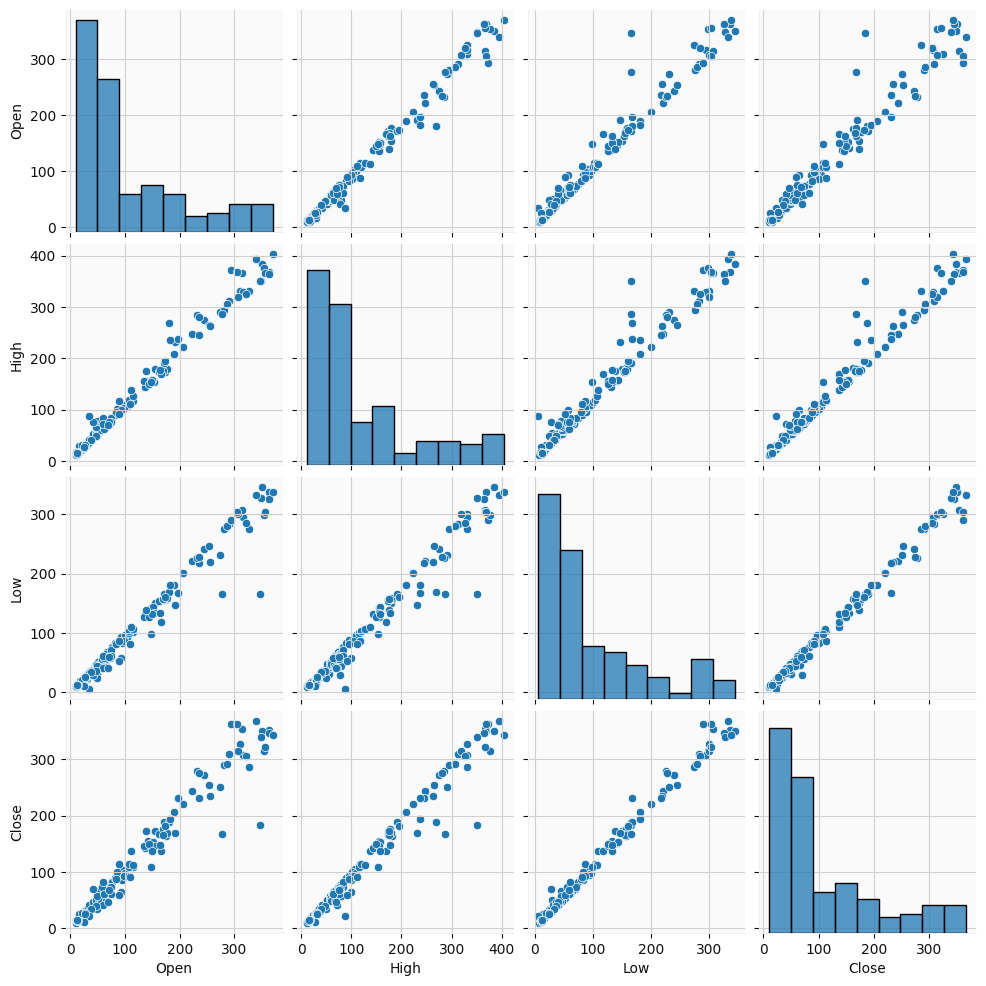

In [ ]:
# Chart - 9 visualization code
sns.pairplot(df1)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

##### 2. What is/are the insight(s) found from the chart?

All the columns are highly corelated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# There are no missing value present in this dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Transformation has already taken care of outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# No any categorical column in this dataset

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

No any textual data present.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I am going to create a new feature by takinig mean from the each record of independent variables.

df1['Mean_OHL'] = df1[['Open', 'High', 'Low']].mean(axis=1)
df1.head()

,Date,Open,High,Low,Close,Mean_OHL
0,2005-07-01,13.00,14.00,11.25,12.46,12.750000
1,2005-08-01,12.58,14.88,12.55,13.42,13.336667
2,2005-09-01,13.48,14.87,12.27,13.30,13.540000
3,2005-10-01,13.20,14.47,12.40,12.99,13.356667
4,2005-11-01,13.35,13.88,12.88,13.41,13.370000


<Axes: xlabel='Mean_OHL', ylabel='Density'>

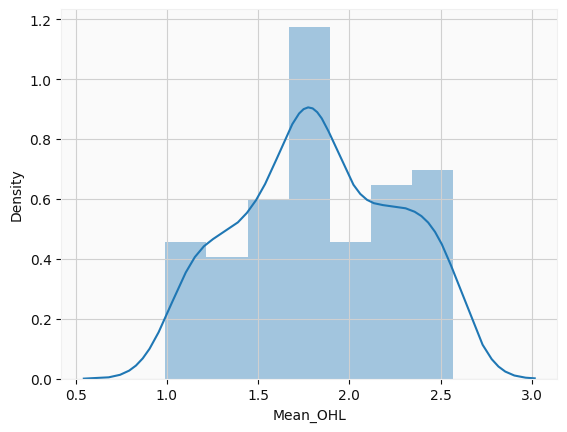

In [ ]:
x=np.log10(df1['Mean_OHL'])
sns.distplot(x)

Now, I am using only Mean_OHL column and lag values, which will take the previous month OHL value. It will be useful to cover underlying patterns in this kind of problem.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No need to transform.Data has been already transformed

### 6. Data Scaling

In [ ]:
# Scaling your data

df1 = df.copy() #copying the orginal data
transformer_log = FunctionTransformer(np.log1p)
df_log = pd.DataFrame(transformer_log.transform(df1.drop("Date", axis = 1)), columns=df1.columns)

# Print the original and scaled DataFrames
print("Original DataFrame:")
print(df1)
print("\nLog Transformation:")
print(df_log)

Original DataFrame:
          Date   Open   High    Low  Close
0   2005-07-01  13.00  14.00  11.25  12.46
1   2005-08-01  12.58  14.88  12.55  13.42
2   2005-09-01  13.48  14.87  12.27  13.30
3   2005-10-01  13.20  14.47  12.40  12.99
4   2005-11-01  13.35  13.88  12.88  13.41
..         ...    ...    ...    ...    ...
180 2020-07-01  25.60  28.30  11.10  11.95
181 2020-08-01  12.00  17.16  11.85  14.37
182 2020-09-01  14.30  15.34  12.75  13.15
183 2020-10-01  13.30  14.01  12.11  12.42
184 2020-11-01  12.41  14.90  12.21  14.67

[185 rows x 5 columns]

Log Transformation:
     Date      Open      High       Low     Close
0     NaN  2.639057  2.708050  2.505526  2.599722
1     NaN  2.608598  2.765060  2.606387  2.668616
2     NaN  2.672768  2.764431  2.585506  2.660260
3     NaN  2.653242  2.738903  2.595255  2.638343
4     NaN  2.663750  2.700018  2.630449  2.667922
..    ...       ...       ...       ...       ...
180   NaN  3.280911  3.377588  2.493205  2.561096
181   NaN  2.564949

##### Which method have you used to scale you data and why?

We use function transformer to scale data in same range to avoid the biasness of model.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As I have only few features, dimensionality reduction is not necessary

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

x = df1.iloc[:, 1:-1]
y = df1.Close
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why?

Data splitting is a common technique used in machine learning and data analysis to evaluate the performance of a model on an independent dataset. We used 80-20 split rule to split data.

80:20 split - In this split, the dataset is divided into two parts - training set and testing set. The training set contains 80% of the data, while the testing set contains the remaining 20% of the data. This split is commonly used when the dataset is large and the model requires significant training time. The training set is used to train the model, and the testing set is used to evaluate the model's performance.

### 9. Handling Imbalanced Dataset

No need to handle imbalanced data.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regresssion

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)


In [ ]:
reg.score(X_train,y_train)


0.9954546486753905

In [ ]:
# Predict on the model
y_pred=reg.predict(X_test)

In [ ]:
comparision_trans = pd.DataFrame((zip(y_test, y_pred)), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,34.06,32.050419
1,145.23,141.394046
2,46.95,44.618677
3,142.08,142.184769
4,62.22,67.106936


In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("\n")
print("The mean squared error on test dataset is", mse)

rmse=np.sqrt(mse)
print("\n")
print("The root mean squared error on test dataset is", rmse)

r2=r2_score(y_test,y_pred)
print("\n")
print("The R2 on test dataset is", r2)

Adjusted_R2=(1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("\n")
print("The Adjusted R2 on test dataset is", Adjusted_R2)

mae = mean_absolute_error(y_test, y_pred)
print("\n")
print("The mean absolute error on test dataset is", mae)



The mean squared error on test dataset is 77.87298624685224


The root mean squared error on test dataset is 8.824567198840532


The R2 on test dataset is 0.9930815866308079


The Adjusted R2 on test dataset is 0.9924526399608814


The mean absolute error on test dataset is 5.3976232696619775


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

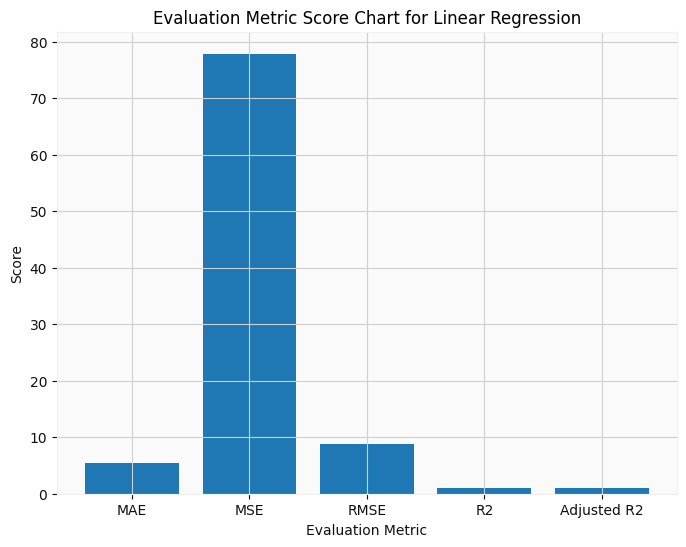

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [mae,mse,rmse,r2,Adjusted_R2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression')
plt.show()

I have implemented Basic Linear regression model.

The linear regression model assumes that the relationship between the dependent variable (Close) and the independent variables is linear, which means that the change in the dependent variable is proportional to the change in the independent variables.

During the training process, the linear regression model tries to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values of the dependent variable.



If we look at metric score we can say model is performing well on unseen data  but we will apply hypertuning and cross validation to improve model performance.

In [ ]:
linear_regessor_list = {'Mean Absolute Error':mae,'Mean squared Error' : mse,'Root Mean squared Error' : rmse,' R2 score' : r2,'Adjusted R2 score' : Adjusted_R2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_score'})
metrics

,Metric,reg_score
0,Mean Absolute Error,5.397623
1,Mean squared Error,77.872986
2,Root Mean squared Error,8.824567
3,R2 score,0.993082
4,Adjusted R2 score,0.992453


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(reg, param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(X_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(X_test)
y_pred_train_gs=Lr_gs.predict(X_train)


In [ ]:
# Metric Score for test set
MAE_gs = mean_absolute_error(y_test,y_pred_test_gs)
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(y_test, y_pred_test_gs)
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(y_test, y_pred_test_gs)
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(y_test, y_pred_test_gs))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)

Mean Absolute Error : 5.196282305508649
MSE : 77.43127573968593
RMSE : 8.799504289429374
R2 : 0.9931208291977798
Adjusted R2: 0.9924954500339416


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

my goal is to find the best hyperparameters values to get the perfect prediction results from our model.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have not seen any improvement in the model because moddel performance at it's peak.

In [ ]:
metrics['After_CV_score'] = [MAE_gs, MSE_gs, RMSE_gs, r2_gs, adjusted_r2_gs]
metrics

,Metric,reg_score,After_CV_score
0,Mean Absolute Error,5.397623,5.196282
1,Mean squared Error,77.872986,77.431276
2,Root Mean squared Error,8.824567,8.799504
3,R2 score,0.993082,0.993121
4,Adjusted R2 score,0.992453,0.992495


### ML Model - 2 - Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(X_train,y_train)

# Predict on the model
y_pred_test_rf =rf.predict(X_test)

In [ ]:
rf.score(X_train, y_train)

0.9982462695097906

In [ ]:
MAE_rf = mean_absolute_error(y_test,y_pred_test_rf)
print(f"Mean Absolute Error : {MAE_rf}")

MSE_rf  = mean_squared_error(y_test, y_pred_test_rf)
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

r2_rf = r2_score(y_test, y_pred_test_rf)
print("R2 :" ,r2_rf)

adjusted_r2_rf=1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf)

Mean Absolute Error : 7.984213513513558
MSE : 167.93087853865018
RMSE : 12.958814704233184
R2 : 0.9850806384707131
Adjusted R2: 0.9837243328771416


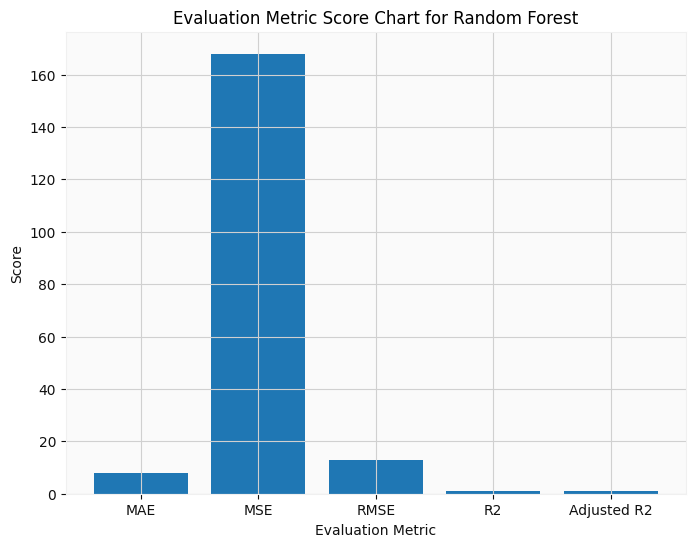

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE_rf,MSE_rf,RMSE_rf,r2_rf,adjusted_r2_rf]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Random Forest')
plt.show()

I have implemented RandomForest model.

Random forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

The RandomForestRegressor class allows you to train a regression model using the random forest algorithm, and then use it to make predictions on new data.

During the training process, the algorithm randomly selects a subset of features and a subset of observations to construct each decision tree.

This helps to reduce overfitting and improve the generalization performance of the model.


It can be clearly seen that model is not performed well on unseen data indicating overfitting. Lets overcome that by tuning hyperparameter and using cross validation

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_leaf=20, min_samples_split=20, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=20, min_samples_split=20, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=20, min_samples_split=20, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=20, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=20, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=1

In [ ]:
best_model_rf_rs.feature_importances_

array([0.02358372, 0.28088214, 0.69553414])

In [ ]:
print(best_model_rf_rs)

RandomForestRegressor(max_depth=2, min_samples_leaf=8, min_samples_split=50,
                      n_estimators=80)


In [ ]:
# Predict the model
y_pred_test_rf_rs= random_search.predict(X_test)


In [ ]:
random_search.score(X_train,y_train)

0.8953082682463795

In [ ]:
MAE_rf_rs = mean_absolute_error(y_test, y_pred_test_rf_rs)
print(f"Mean Absolute Error : {MAE_rf_rs}")

MSE_rf_rs  = mean_squared_error(y_test, y_pred_test_rf_rs)
print("MSE :" , MSE_rf_rs)

RMSE_rf_rs = np.sqrt(MSE_rf_rs)
print("RMSE :" ,RMSE_rf_rs)

r2_rf_rs = r2_score(y_test, y_pred_test_rf_rs)
print("R2 :" ,r2_rf_rs)

adjusted_r2_rf_rs=1-(1-r2_score(y_test, y_pred_test_rf_rs))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf_rs)

Mean Absolute Error : 23.829199646976083
MSE : 1279.168533368541
RMSE : 35.7654656528968
R2 : 0.8863557555805881
Adjusted R2: 0.8760244606333688


##### Which hyperparameter optimization technique have you used and why?

I have used randomised cv to get best parameter to boost model performance but i think model is already performing good.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is slight improvement in the model but the improvement is negligble beecause model is already performing well.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making.

Adjusted R2 score:

In a business context, a high adjusted R2 score can indicate that the model is able to make accurate predictions with a reasonable level of complexity, which could be more practical for deployment in a business setting.

Mean absolute error (MAE):

The MAE is a measure of the average absolute error of the model's predictions.

In a business context, a low MAE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions.

Root mean squared error (RMSE):

The RMSE is a measure of the average squared error of the model's predictions.

In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions.

### ML Model - 3 - XGBoost

In [ ]:
# ML Model - 3 Implementation

xgboost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xgboost.fit(X_train,y_train)

# Predict on the model

y_pred_test_xg =xgboost.predict(X_test)


In [ ]:
xgboost.score(X_train, y_train)

0.9999997639581867

In [ ]:
MAE_xg = mean_absolute_error((y_test),(y_pred_test_xg))
print(f"Mean Absolute Error : {MAE_xg}")

MSE_xg  = mean_squared_error((y_test), (y_pred_test_xg))
print("MSE :" , MSE_xg)

RMSE_xg = np.sqrt(MSE_xg)
print("RMSE :" ,RMSE_xg)

r2_xg = r2_score((y_test), (y_pred_test_xg))
print("R2 :" ,r2_xg)

adjusted_r2_xg=1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_xg)

Mean Absolute Error : 7.583915641372269
MSE : 162.75892196899224
RMSE : 12.757700496915275
R2 : 0.985540126865867
Adjusted R2: 0.9842255929445822


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

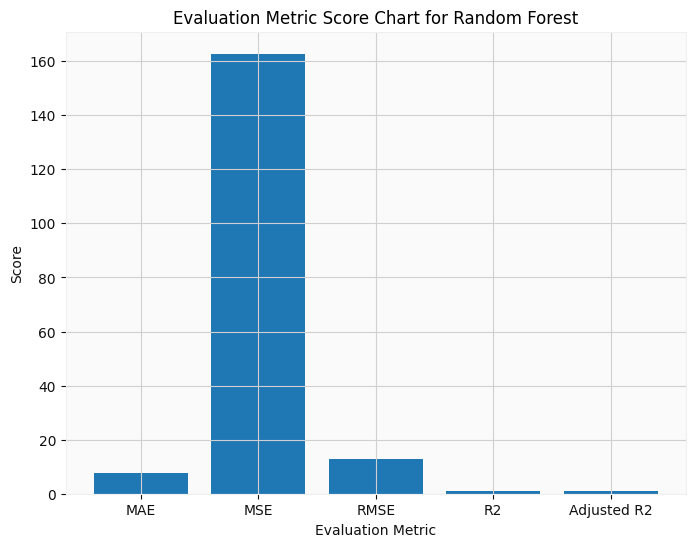

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE_xg,MSE_xg,RMSE_xg,r2_xg,adjusted_r2_xg]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Random Forest')
plt.show()

It is a popular machine learning algorithm that uses an ensemble of decision trees to make predictions.

The XGBRegressor class allows us to train a regression model using the XGBoost algorithm which is then used to make predictions on new data.

The model is trained by fitting a sequence of decision trees to the training data, with each new tree trying to correct the errors of the previous trees.

The final model is a weighted sum of these individual trees.

If we look at the evaluation metric score R2 score is very good so we can our model is performing good

I Think there is no need of tune our model because it is alredy performing well.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

I Think there is no need of tune our model because it is alredy performing well.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered R2. adjusted R2 and RMSE as evaluation metrics.

R2 score is a measure of how well the model fits the data.

It ranges from 0 to 1, with a higher value indicating a better fit which means that the model is able to explain a large portion of the variance in the data which could have a positive impact on decision-making.

The adjusted R-squared provides a penalized measure of model fit that takes into account both the explanatory power of the model and the complexity of the model. It is particularly useful when comparing models with different numbers of predictors. A higher adjusted R-squared indicates a better fit of the model, as it reflects the proportion of variance in the dependent variable that is explained by the independent variables, adjusted for the model complexity.

RMSE is a measure of the average squared error of the model's predictions.

It is calculated as the square root of the mean squared error (MSE).

In a business context, a low RMSE can indicate that the model is making relatively small errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From my point of view all of these models have good r2 and adjusted r2 score so i would say all of these are good model and will perform well on unseen data. I am unable to pick a specific moddel because all of these models are good.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
import shap

explainer = shap.KernelExplainer(Lr_gs.predict, X_train)


In [ ]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/37 [00:00<?, ?it/s]

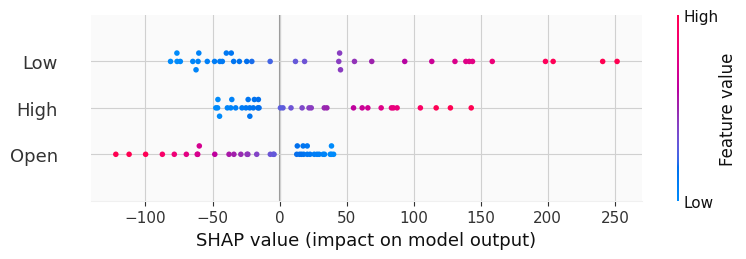

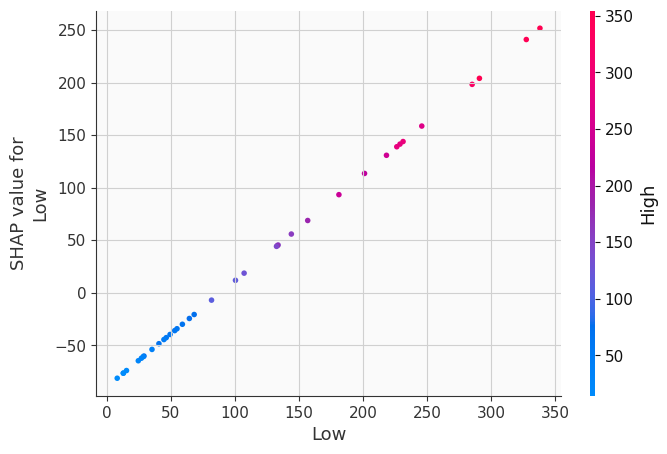

In [ ]:
# creating a summary plot of the SHAP values
shap.summary_plot(shap_values, X_test)

# creating a dependence plot for a specific feature
shap.dependence_plot('Low', shap_values, X_test)

For this  I have considered Linear regression as best model.


Coefficient : By looking at the coefficient of model we can say that High has most impact on target variable where as Open has negative correlation with target variable


SHAP : SHAP values quantify the contribution of each feature to the predicted outcome for a particular instance. The summary plot shows the features ranked in descending order of importance, based on the mean absolute SHAP values are calculated for each instance in the test set. By examining the summary plot, we can identify High and Low have the strongest impact on the model's predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* The main goal of the project is to create a machine learning model which can predict the closing price of Yes Bank stock for that month, keeping in mind of the fraud case happened in 2018.

* I have developed 3 models Linear_regression, Random forest and XGBoost Regressor. Linear_regression model shows promising result with R2 score close to 1 on  test dataset, therefore it can be used to solve this problem. It also considering all newly added features and taking care of multicollinearity.

* Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

* We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.

* The dataset has only monthly related price, a daily level price would be more accurate as model can analyze important patterns like week opening price and weekend price. Volume of the data if provided can also be useful in making prediction. A stock prediction involved many aspects like holidays, political decisions, events, un precedented disasters, human decisions. This can be better predicted by having all these features and using time series models like ARIMA and LSTM can ve predicted more accurately.

* Given the dataset and features, Our model is performing well on all data-points. we can  deploy this model for further predictive tasks using future data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***